In [1]:
from oct_library import OCTProcessing
import torch
from utils import get_filenames
import os
import numpy as np
import yaml
import matplotlib.pyplot as plt

base_path = '../../logs/2022-11-03_19_52_46'
model_path = os.path.join(base_path, 'checkpoints/model.pth')
model = torch.load(model_path, map_location='cuda')
oct_path = '../../dataset/hopkins/vol/'

with open(os.path.join(base_path, 'experiment_cfg.yaml'), "r") as ymlfile:
    cfg = yaml.load(ymlfile, Loader=yaml.FullLoader)
oct_files = get_filenames(oct_path, 'vol')
pick = np.random.randint(0,len(oct_files))
print(pick, oct_files[pick])
oct_process = OCTProcessing(oct_file=oct_files[pick], torchmodel=model) # 125, 36, 10, 68, 15

/home/alonso/anaconda3/envs/embedded/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
B-scans are not equally spaced. Projections into the enface space are distorted.


11 ../../dataset/hopkins/vol/hc12_spectralis_macula_v1_s1_R.vol
No. of Scans:  49
Y-Fovea:  803.0
ScaleY:  0.0038716697599738836
ScaleX:  0.006071509327739477
Visit Date:  2010-05-12T09:48:01
Laterality:  OD


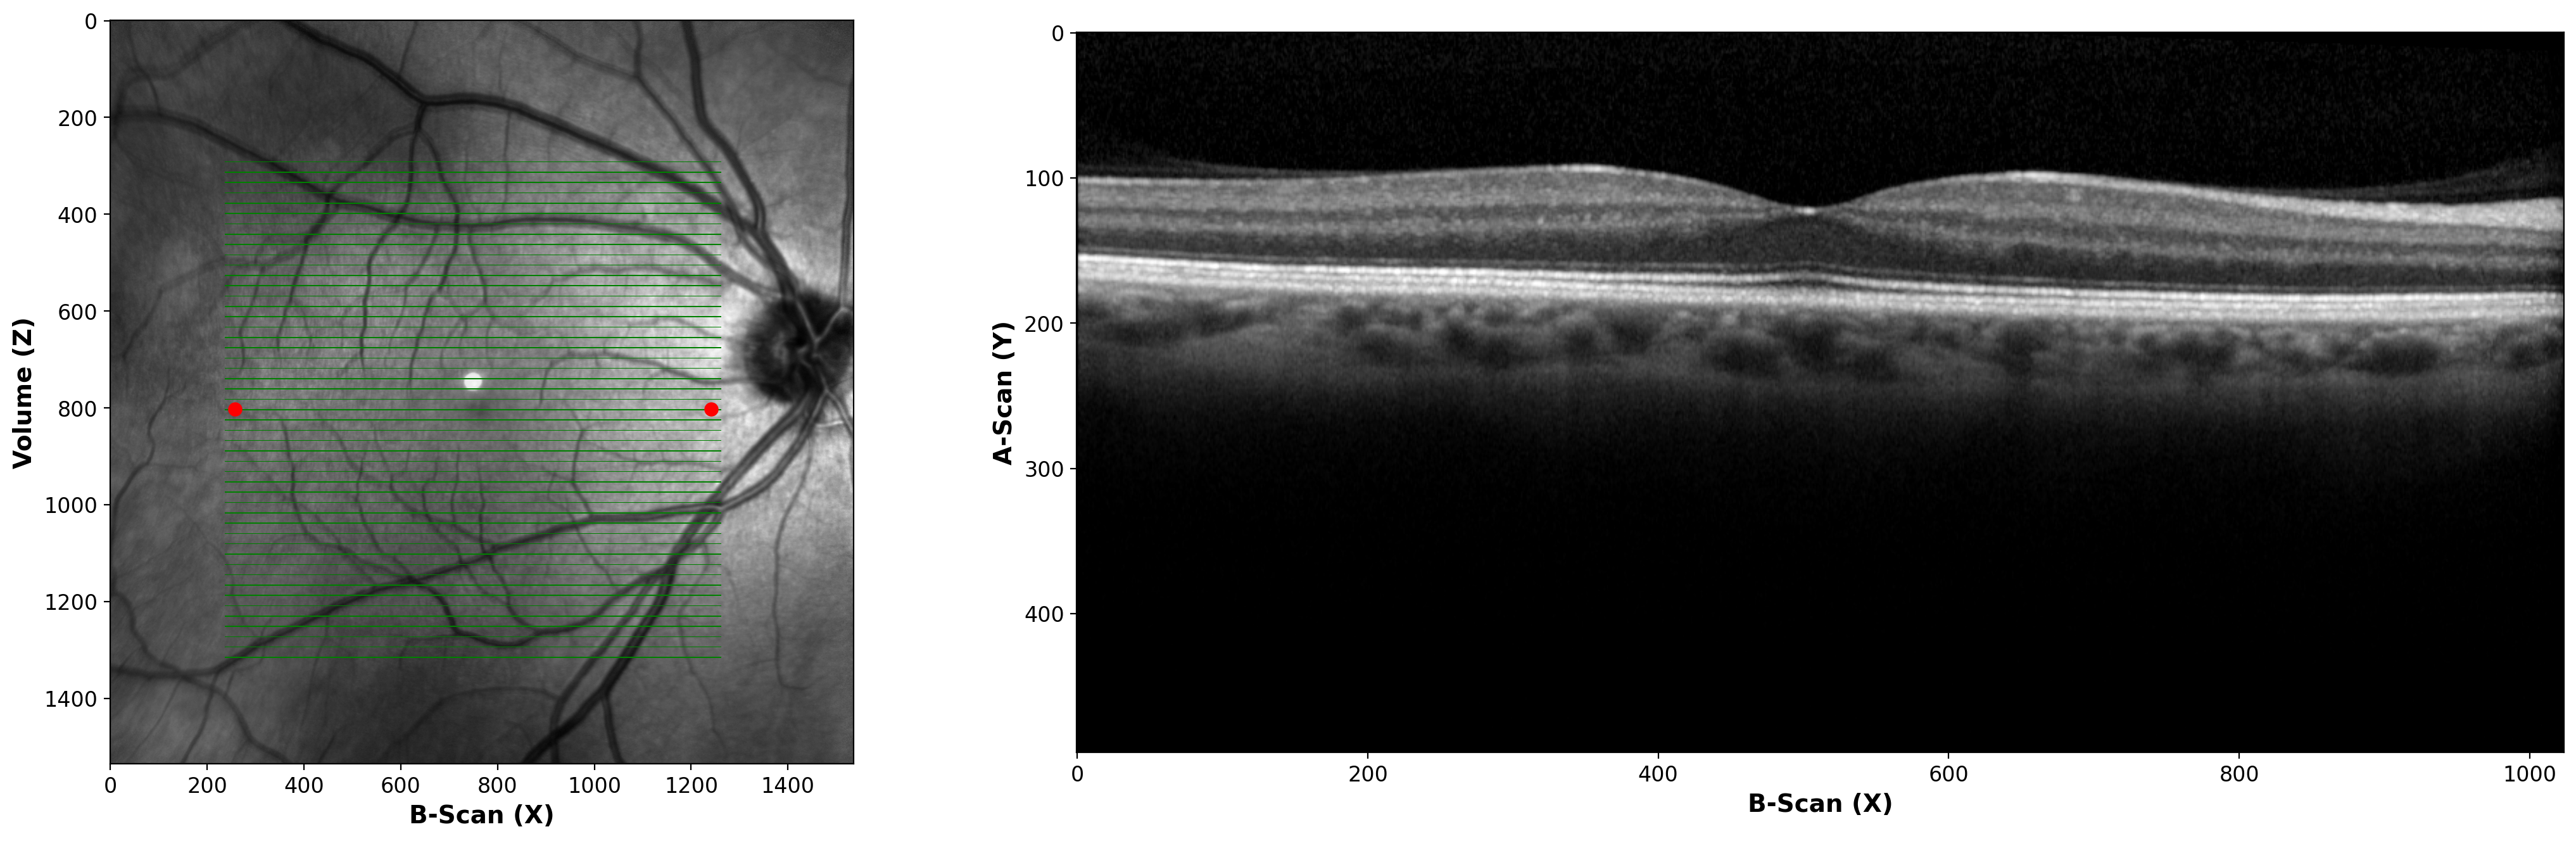

In [2]:
oct_process.plot_slo_fovea()

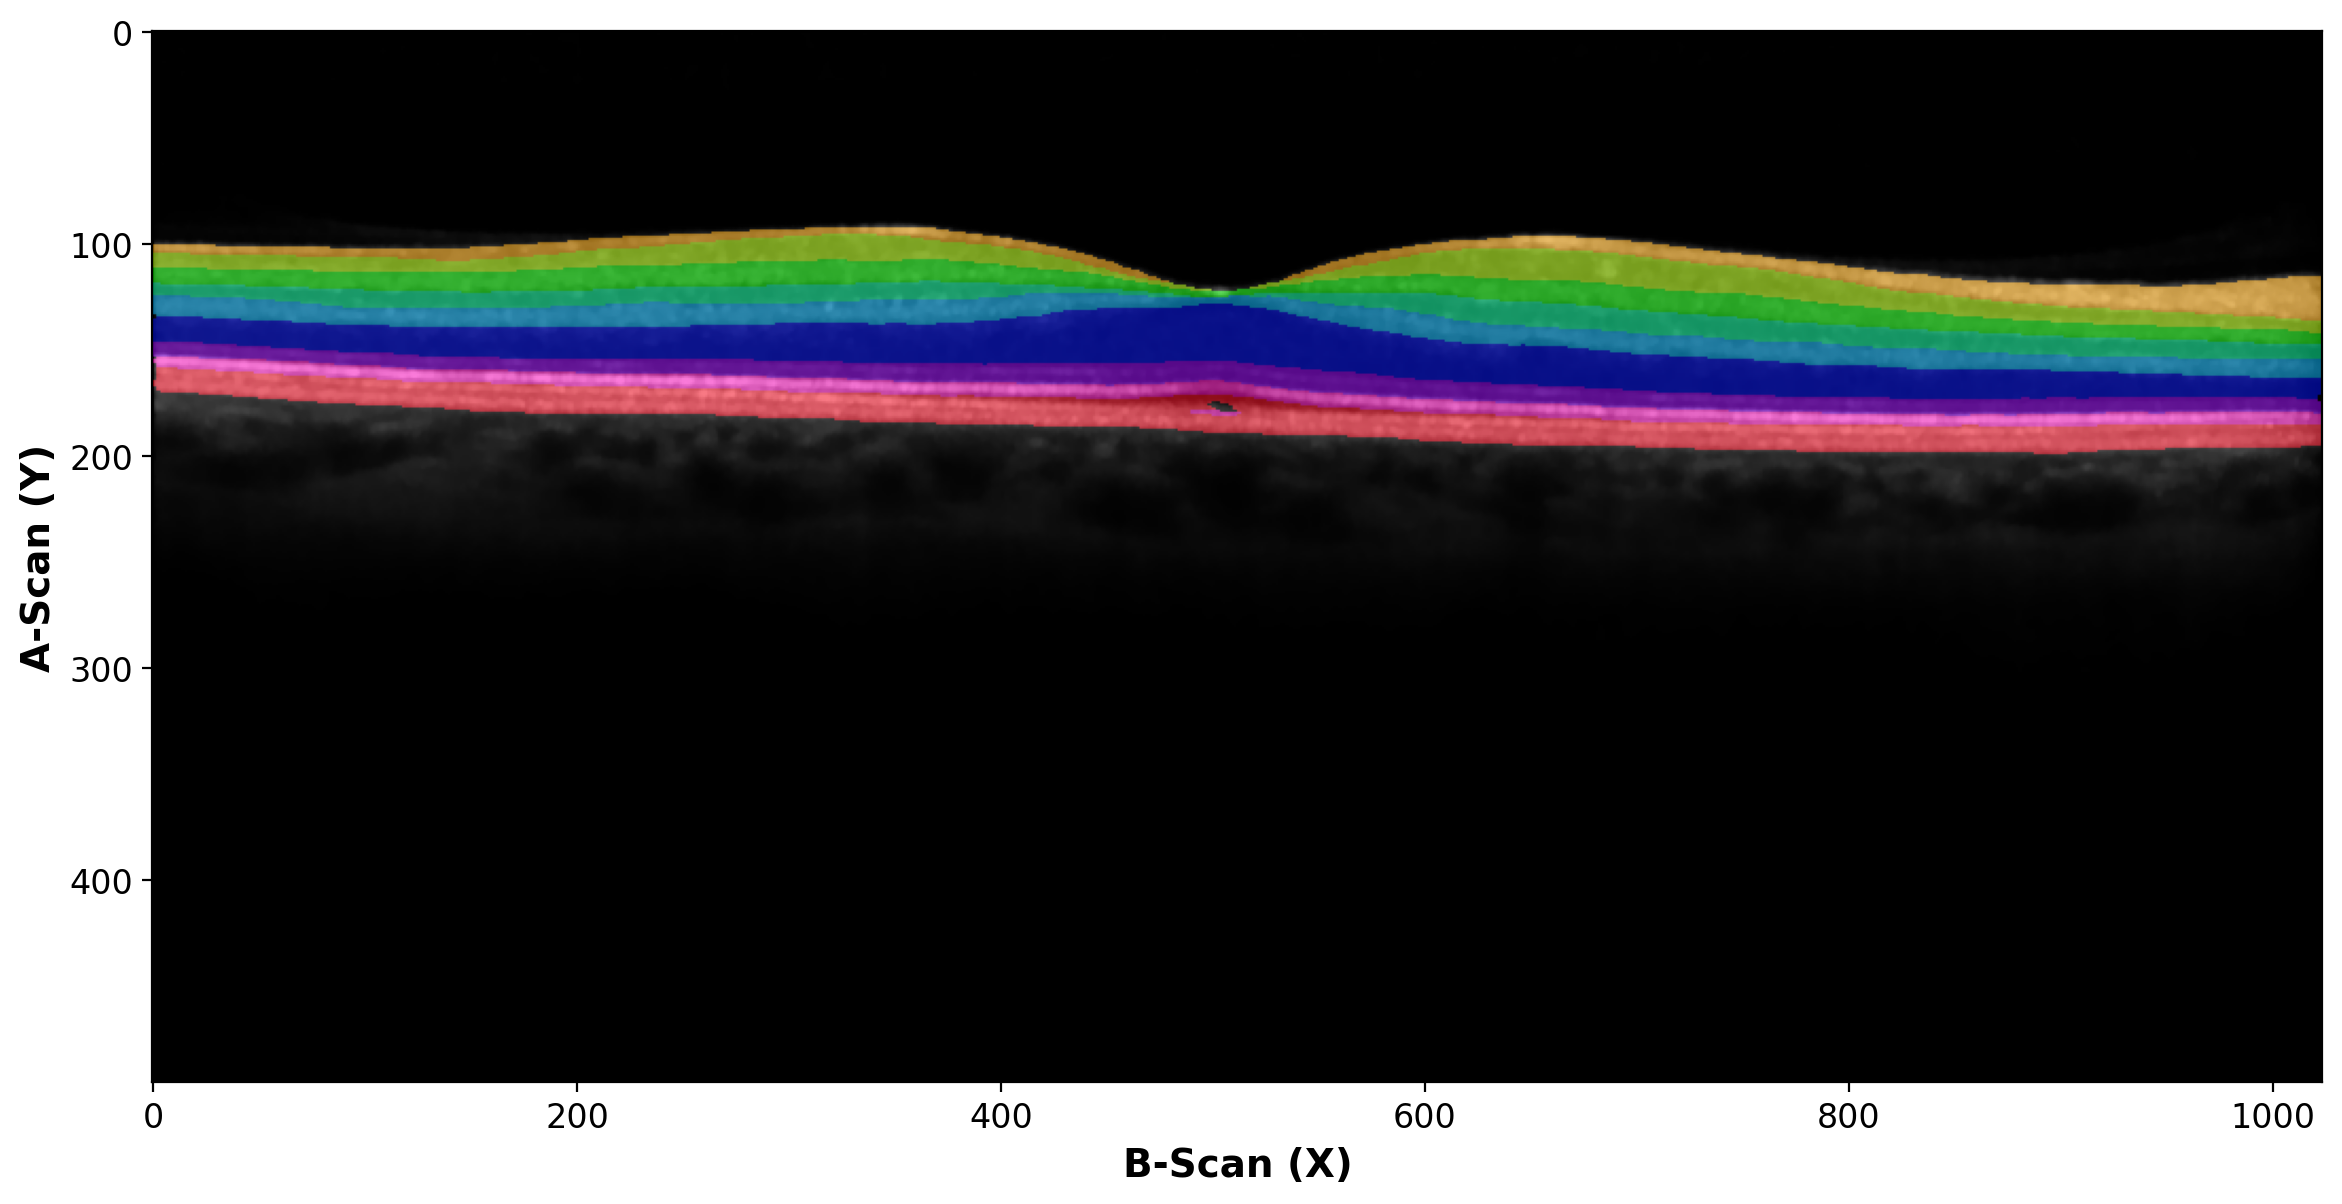

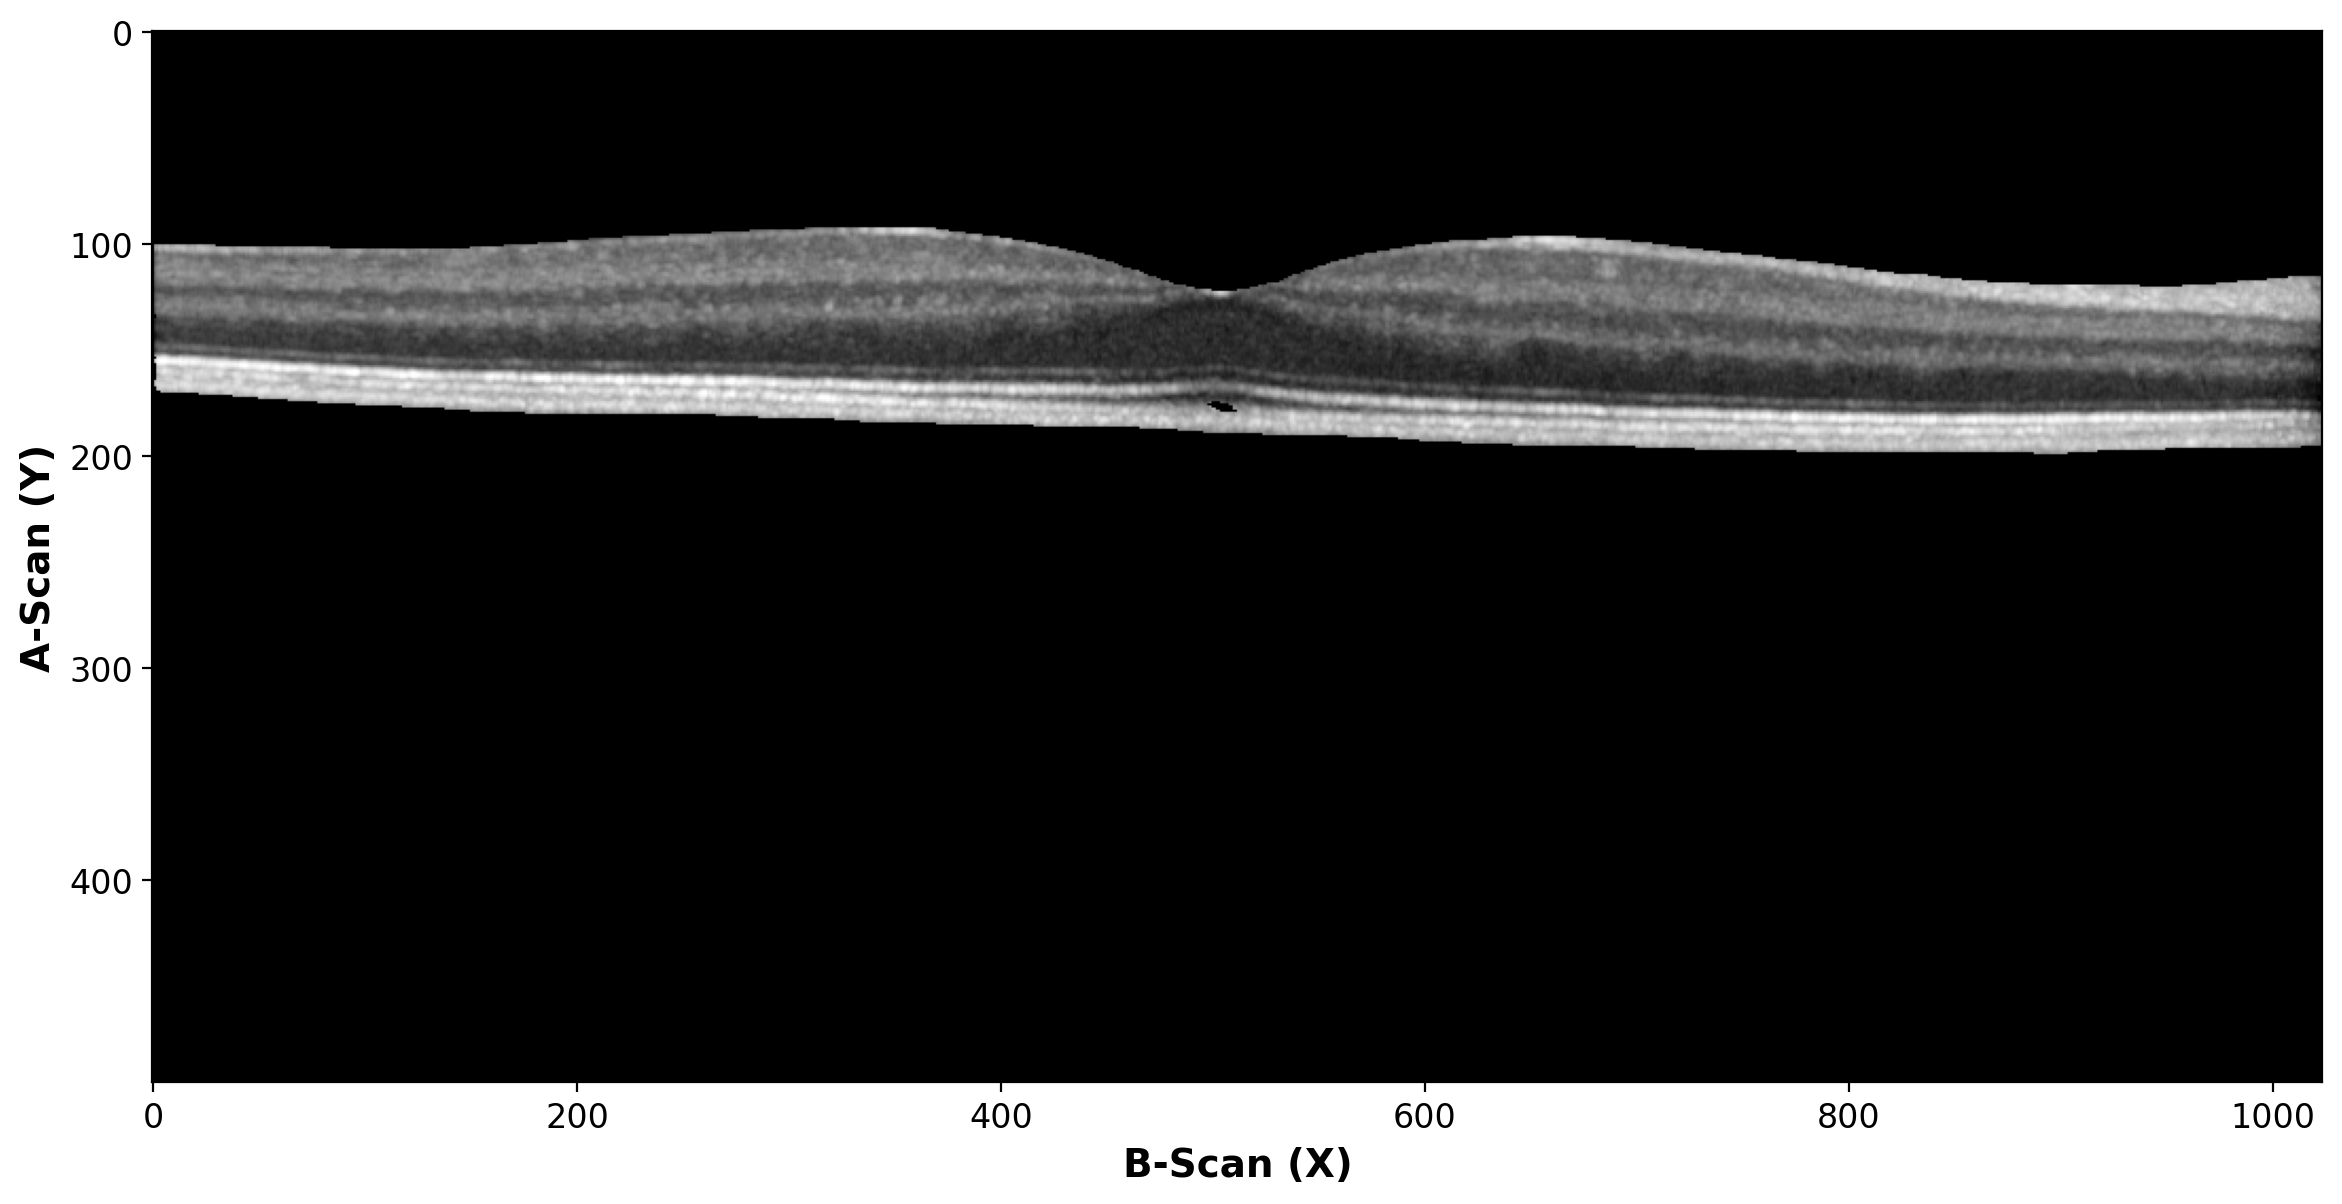

In [3]:
oct_process.fovea_forward(gamma=1.5, alpha=0.02, imgh=cfg['general']['img_sizeh'], imgw=cfg['general']['img_sizew'])
oct_process.plot_overlay_oct_segmentation()
oct_process.plot_segmentation_full()

49


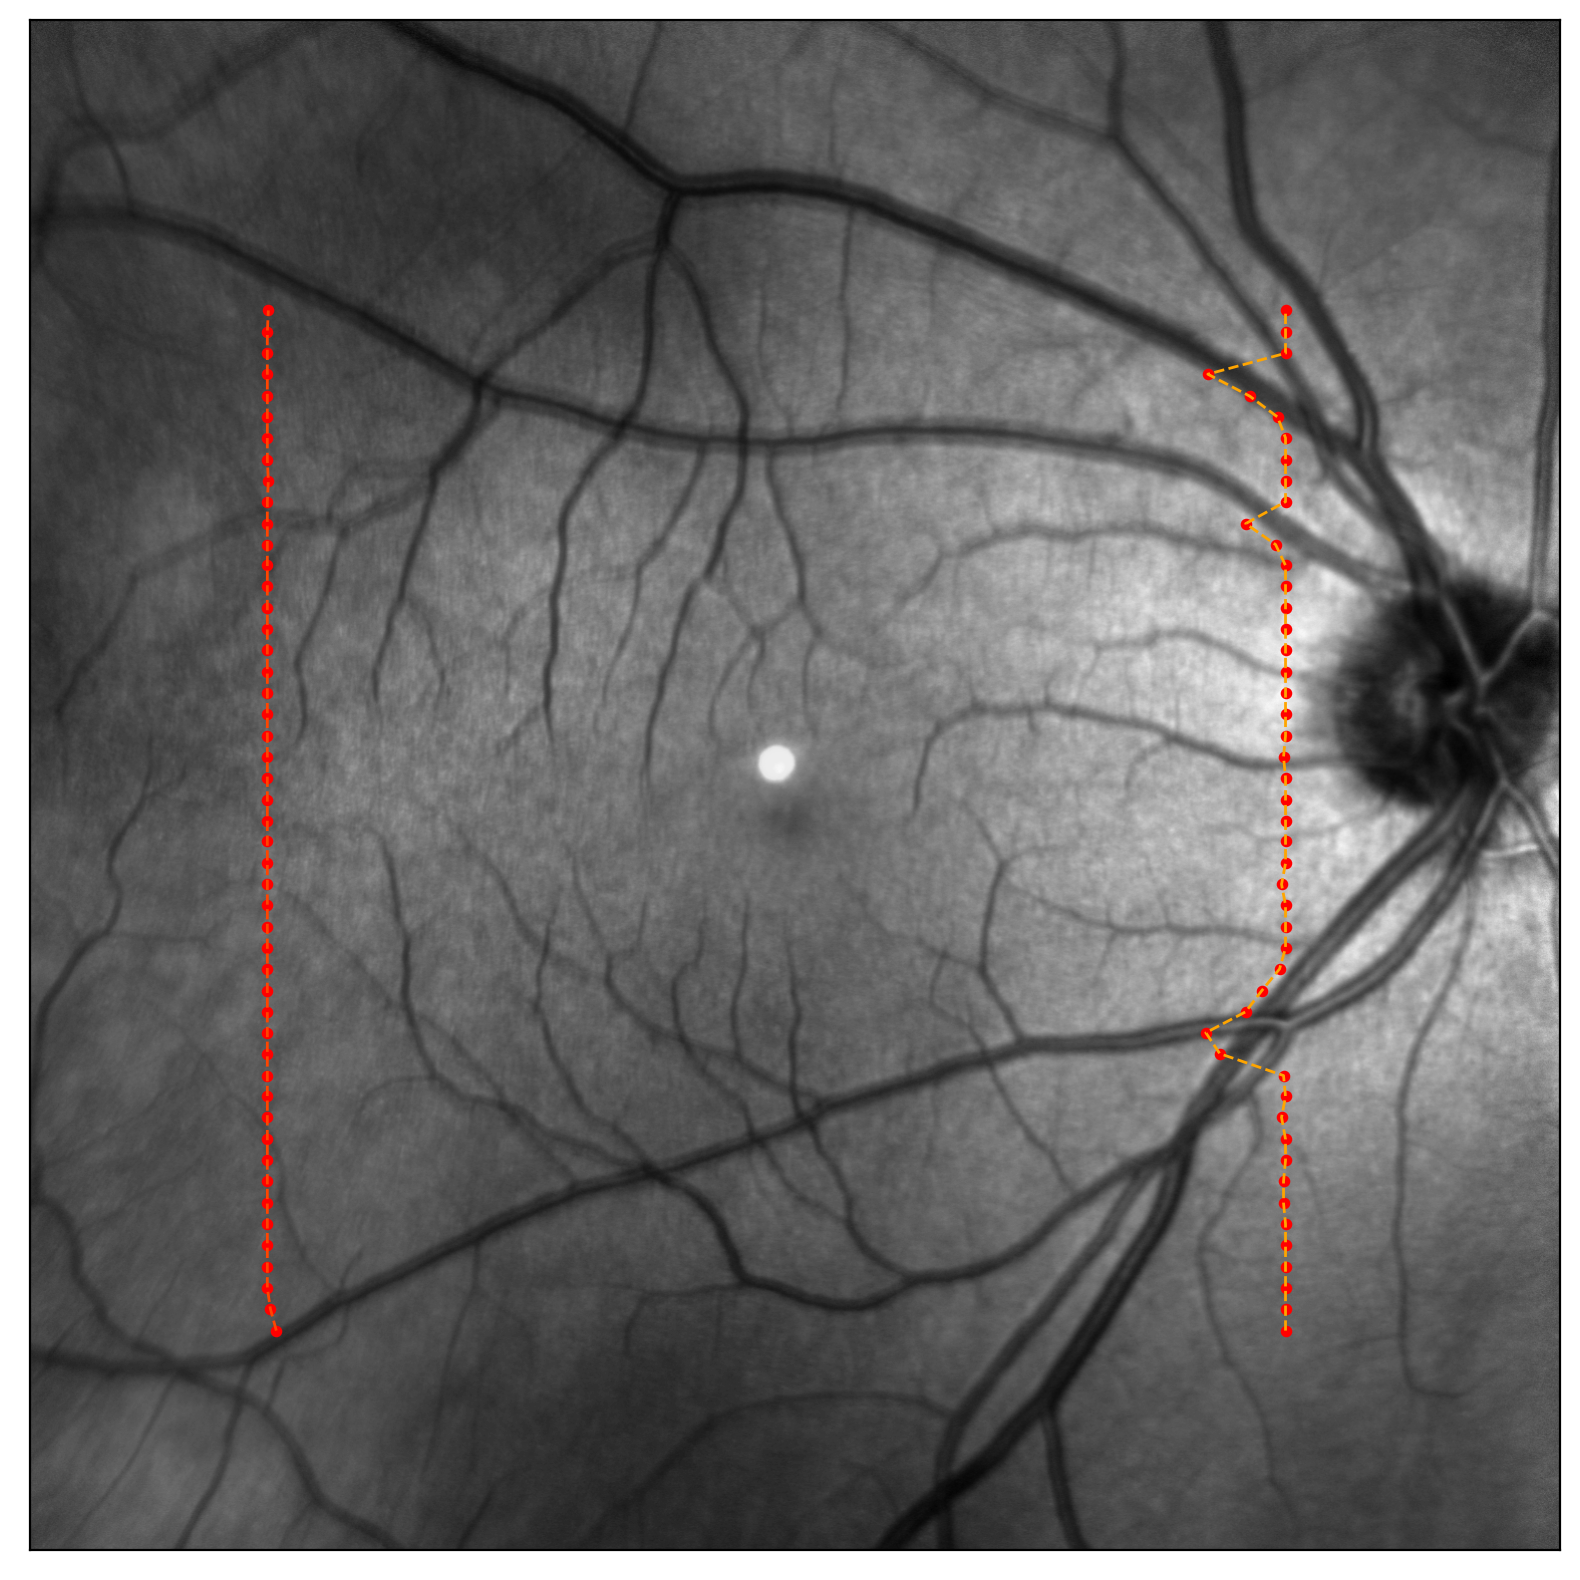

In [4]:
print(len(oct_process))
imgh = cfg['general']['img_sizeh']
imgw = cfg['general']['img_sizew']
Y_POS, delta_ez_lim = oct_process.volume_forward(tv_smooth=False, plot=True, imgh=imgh, imgw=imgw, bscan_positions=False)